In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import numpy as np
import random

font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
df_21 = pd.read_csv('./analyze_Daegu_22_21.csv')
df_22 = pd.read_csv('./analyze_Daegu_22.csv')
df_21_non = pd.read_csv('./analyze_Daegu_21.csv')

df_21.set_index('매장명', inplace=True)
df_22.set_index('매장명', inplace=True)

sr = df_21['인접_상가수']
sr.rename('인접_상가수_21', inplace=True)

df = pd.concat([df_22, sr], axis=1, join='outer')

list_ = ['위도', '경도',  '인접_상가수_21', '인접_상가수', '인접_학교수', '인접_지하철역수', '하루평균유동인구_지하철', '인접_버스정류장수', '하루평균유동인구_버스', '하루평균유동인구_대중교통']
df = df[list_]

df.columns = ['위도', '경도',  '인접_상가수_21', '인접_상가수_22', '인접_학교수', '인접_지하철역수', '하루평균유동인구_지하철', '인접_버스정류장수', '하루평균유동인구_버스', '하루평균유동인구_대중교통']
df.reset_index(inplace=True)
df

,매장명,위도,경도,인접_상가수_21,인접_상가수_22,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통
0,계명대동산병원,35.853811,128.480276,120,144,3,1,11012.89,4,66.76,11079.66
1,대구죽전역,35.848437,128.536007,335,363,7,1,10226.65,4,72.58,10299.23
2,대구월곡DT,35.814866,128.541057,174,202,13,0,0.00,5,83.21,0.00
3,대구광장,35.855770,128.552811,461,588,12,1,12130.89,4,128.23,12259.12
4,대구월촌역,35.824025,128.545226,288,265,14,1,7586.71,5,35.01,7621.72
...,...,...,...,...,...,...,...,...,...,...,...
74,수성레이크,35.825764,128.621814,146,203,5,0,0.00,4,60.64,60.64
75,대구범어제니스,35.859274,128.629687,163,203,6,1,13055.82,2,306.88,13362.70
76,대구두산DT,35.827283,128.625849,178,307,7,0,0.00,5,74.50,74.50
77,대구들안길DT,35.837524,128.616360,200,224,6,0,0.00,4,68.59,68.59


In [5]:
melt_df = df.copy()
melt_df.columns = ['매장명', '위도', '경도', '2021', '2022', '인접_학교수', '인접_지하철역수', '하루평균유동인구_지하철', '인접_버스정류장수', '하루평균유동인구_버스', '하루평균유동인구_대중교통']

melt_df = melt_df.melt(id_vars='매장명', value_vars=['2021', '2022'], var_name='year', value_name='인접 상가수')
melt_df

,매장명,year,인접 상가수
0,계명대동산병원,2021,120
1,대구죽전역,2021,335
2,대구월곡DT,2021,174
3,대구광장,2021,461
4,대구월촌역,2021,288
...,...,...,...
153,수성레이크,2022,203
154,대구범어제니스,2022,203
155,대구두산DT,2022,307
156,대구들안길DT,2022,224


Text(0, 1, '인접 상가 수')

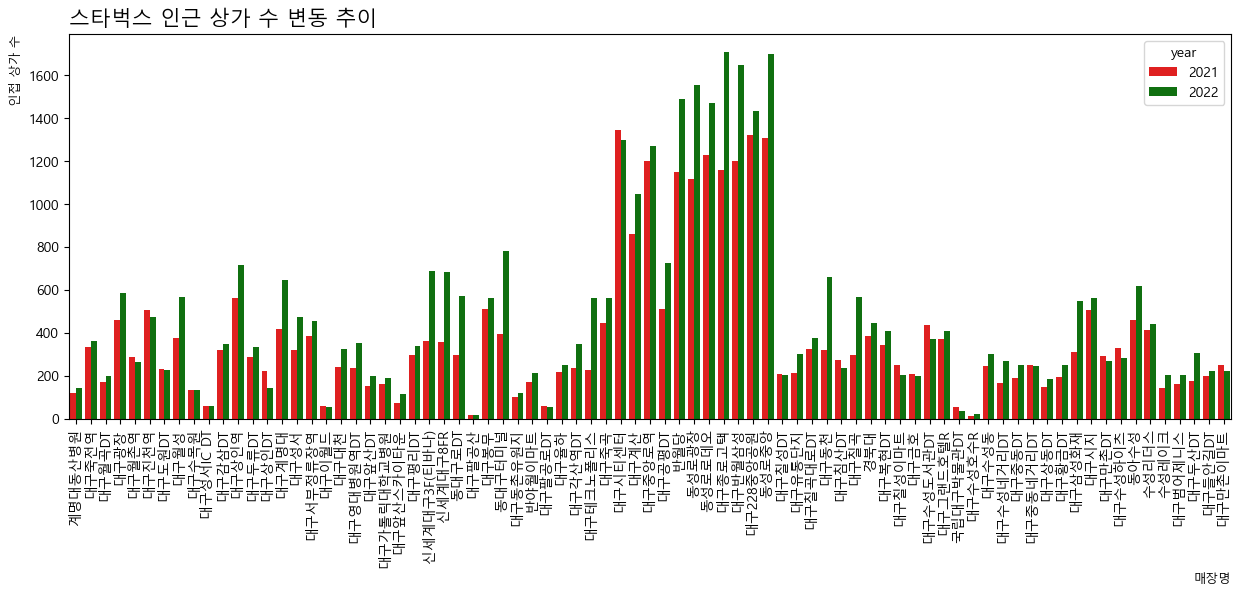

In [35]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,1,1)

sns.barplot(data=melt_df, x='매장명', y='인접 상가수', hue='year', palette=['red','green'], ax=ax1)

plt.xticks(rotation=90)
plt.title('스타벅스 인근 상가 수 변동 추이', fontsize=15, loc='left')
ax1.set_xlabel('매장명', loc='right', fontsize=9)
ax1.set_ylabel('인접 상가 수', loc='top', fontsize=9)


In [7]:
df.describe()

,위도,경도,인접_상가수_21,인접_상가수_22,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,35.858799,128.590926,385.012658,485.037975,7.645570,0.569620,11615.484810,4.645570,389.426329,11998.960633
std,0.037445,0.053783,334.618401,422.463515,3.238542,0.654051,21356.916769,1.724915,483.038876,21691.337151
min,35.693334,128.459251,15.000000,17.000000,1.000000,0.000000,0.000000,2.000000,10.840000,0.000000
25%,35.838890,128.554077,194.000000,209.500000,6.000000,0.000000,0.000000,4.000000,74.170000,81.310000
50%,35.859055,128.596660,293.000000,347.000000,7.000000,0.000000,0.000000,4.000000,205.350000,782.540000
75%,35.870926,128.625823,416.500000,570.500000,10.000000,1.000000,11526.380000,5.000000,431.175000,11817.455000
max,35.987868,128.727397,1346.000000,1707.000000,16.000000,2.000000,83170.510000,10.000000,1826.740000,84732.390000


In [8]:
table = pd.pivot_table(data=df,
                       index='매장명',
                       values=['인접_상가수_21','인접_상가수_22'])

table['증감수'] = table['인접_상가수_22'] -table['인접_상가수_21'] 
table['증감율'] = (table['인접_상가수_22'] -table['인접_상가수_21']) / table['인접_상가수_21'] * 100

table.reset_index(inplace=True)

In [39]:
mask = table['증감율'] < 0

table[mask]

,매장명,인접_상가수_21,인접_상가수_22,증감수,증감율
2,국립대구박물관DT,55,38,-17,-30.909091
12,대구금호,208,199,-9,-4.326923
14,대구도원DT,232,226,-6,-2.586207
20,대구만촌DT,293,268,-25,-8.532423
21,대구만촌이마트,252,223,-29,-11.507937
28,대구상인DT,222,144,-78,-35.135135
33,대구수목원,136,134,-2,-1.470588
35,대구수성도서관DT,436,371,-65,-14.908257
37,대구수성하이츠,329,286,-43,-13.069909
40,대구시티센터,1346,1299,-47,-3.491828


Text(0, 1, '증감수')

C:\Users\a\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\a\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


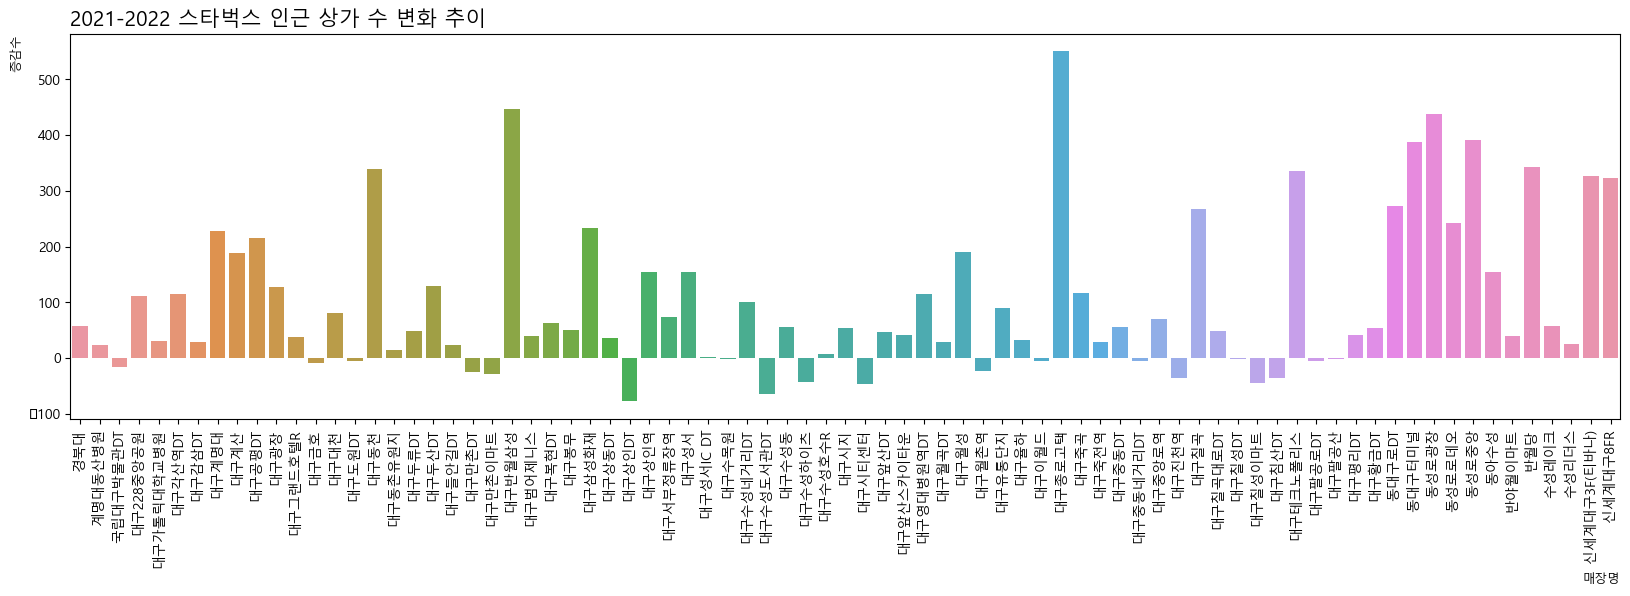

In [9]:
fig2 = plt.figure(figsize=(20,5))
ax2 = fig2.add_subplot(1,1,1)

sns.barplot(data=table, x='매장명', y='증감수', ax=ax2)

plt.xticks(rotation=90)
plt.title('2021-2022 스타벅스 인근 상가 수 변화 추이', fontsize=15, loc='left')
ax2.set_xlabel('매장명', loc='right', fontsize=9)
ax2.set_ylabel('증감수', loc='top', fontsize=9)



Text(0, 1, '증감수')

C:\Users\a\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\a\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


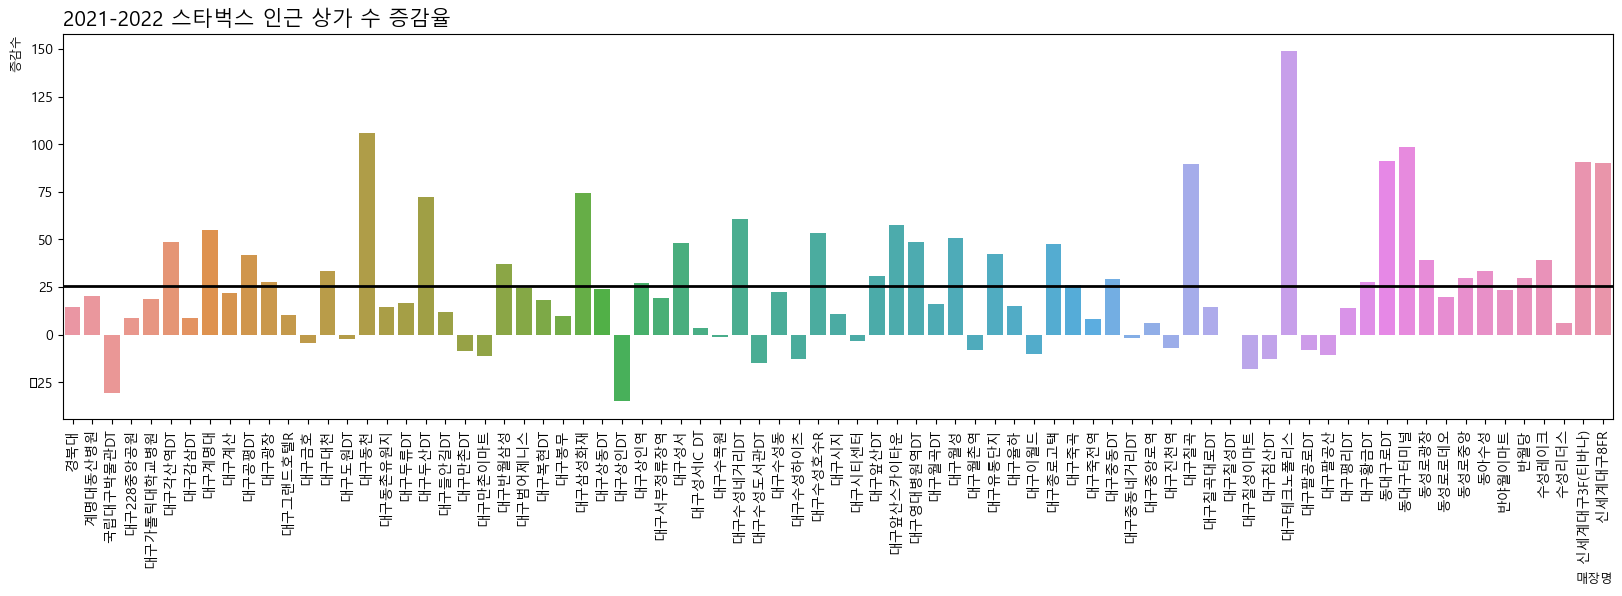

In [10]:
fig3 = plt.figure(figsize=(20,5))
ax3 = fig3.add_subplot(1,1,1)

mean_percent = table['증감율'].mean()

sns.barplot(data=table, x='매장명', y='증감율', ax=ax3)
plt.axhline(y=mean_percent, color='black', linewidth=2)

plt.xticks(rotation=90)
plt.title('2021-2022 스타벅스 인근 상가 수 증감율', fontsize=15, loc='left')
ax3.set_xlabel('매장명', loc='right', fontsize=9)
ax3.set_ylabel('증감수', loc='top', fontsize=9)




Text(0, 1, '증감율')

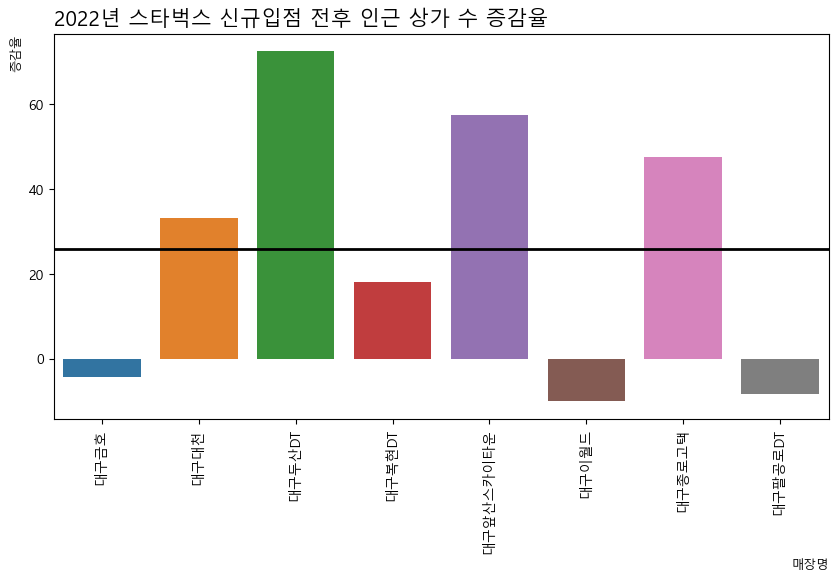

In [36]:
df_22 = pd.read_csv('./analyze_Daegu_22.csv')
df_21_non = pd.read_csv('./analyze_Daegu_21.csv')

sr_22 = df_22['매장명']
sr_21 = df_21_non['매장명']

not_21_list = list(sr_22[~sr_22.isin(sr_21)])

table_nonplace = table[table['매장명'].isin(not_21_list)]
mean_nonplace_percent = table_nonplace['증감율'].mean()

fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(1,1,1)

sns.barplot(data=table_nonplace, x='매장명', y='증감율', ax=ax4)

plt.axhline(y=mean_nonplace_percent, color='black', linewidth=2)
plt.xticks(rotation=90)
plt.title('2022년 스타벅스 신규입점 전후 인근 상가 수 증감율', fontsize=15, loc='left')
ax4.set_xlabel('매장명', loc='right', fontsize=9)
ax4.set_ylabel('증감율', loc='top', fontsize=9)



In [12]:
table.iloc[12]

매장명              대구금호
인접_상가수_21         208
인접_상가수_22         199
증감수                -9
증감율         -4.326923
Name: 12, dtype: object

In [41]:
table['증감율'].mean()

25.592909456560726

In [52]:
df = pd.read_csv('./new3.csv')

df

,Unnamed: 0,매장명,위도,경도,인접_상가수,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통,인접_아파트
0,0,청라-남산,35.860868,128.582262,192,16,2,18148.31,3,202.95,18351.26,6
1,1,청라-반고개,35.863240,128.577219,158,14,1,12566.32,3,55.47,12621.79,2


In [56]:
result = pd.DataFrame(df_22.mean())

result

C:\Users\a\AppData\Local\Temp\ipykernel_6880\1777001757.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result = pd.DataFrame(df_22.mean())


,0
위도,35.858799
경도,128.590926
인접_상가수,485.037975
인접_학교수,7.645570
인접_지하철역수,0.569620
하루평균유동인구_지하철,11615.484810
인접_버스정류장수,4.645570
하루평균유동인구_버스,389.426329
하루평균유동인구_대중교통,11998.960633
